This notebook contains a few exercises on NumPy and Scipy. 

Assigned readings:
* [A Visual Intro to NumPy and Data Representation](http://jalammar.github.io/visual-numpy) by Jay Alammar, **up to "Transposing and Reshaping**.
* [Scipy introduction](https://docs.scipy.org/doc/scipy/tutorial/general.html)
* [Scipy IO tutorial](https://docs.scipy.org/doc/scipy/tutorial/io.html)

Exercises marked with **!** require information not found in the assigned readings. To solve them you will have to explore the online documentations:
* [NumPy](https://numpy.org/doc/stable/user/index.html)
* [Scipy](https://docs.scipy.org/doc/scipy/tutorial/index.html)

You can also consult this [NumPy cheat sheet](https://assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf) which contains a selection of useful functions for different tasks 

# Numpy

## Operations on 1D arrays

To practice with operations on 1D NumPy arrays, we will illustrate the law of large numbers. Before we start, we will import the NumPy module and fix the random seed used in the random number generator:

In [1]:
import numpy as np

np.random.seed(0)

**Exercise 1.1.1**

Create a 1D array of 50 random numbers drawn from the uniform distribution in [0,1]. Determine the minimum, maximum and mean value in the array.

In [2]:
rn = np.random.random(50)
rn

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
       0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152,
       0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606,
       0.0871293 , 0.0202184 , 0.83261985, 0.77815675, 0.87001215,
       0.97861834, 0.79915856, 0.46147936, 0.78052918, 0.11827443,
       0.63992102, 0.14335329, 0.94466892, 0.52184832, 0.41466194,
       0.26455561, 0.77423369, 0.45615033, 0.56843395, 0.0187898 ,
       0.6176355 , 0.61209572, 0.616934  , 0.94374808, 0.6818203 ,
       0.3595079 , 0.43703195, 0.6976312 , 0.06022547, 0.66676672,
       0.67063787, 0.21038256, 0.1289263 , 0.31542835, 0.36371077])

In [3]:
rn.max()

np.float64(0.978618342232764)

In [4]:
rn.min()

np.float64(0.018789800436355142)

In [5]:
rn.mean()

np.float64(0.5379651182755409)

**Exercise 1.1.2**

Create a Python list with 100 elements where element $i$ is the mean of an array of $i$ elements drawn from the uniform distribution in [0,1].

In [6]:
means = []

for i in range(1, 101):
    random_numbers = np.random.random(i)  # Generate i random numbers
    mean = random_numbers.mean()  # Calculate the mean
    means.append(mean)

Which one of the 5th, 50th and 100th element is closest to 0.5?

In [7]:
print(means[4], means[49], means[99])

0.2520879254607531 0.5306797514110339 0.47843320247041166


Assuming that the previous Python list is stored in a variable called `means`, its content can be plotted as follows:



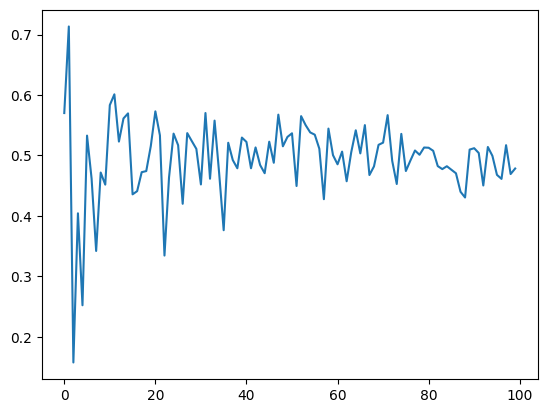

In [8]:
from matplotlib import pyplot as plt

plt.plot(means)

If all went well, the list should converge to 0.5!

## Operations on 2D arrays

We will practice operations on 2D NumPy arrays by manipulating 2D images. The Python Imaging Library (PIL) provides an easy way to load 2D images of various types in NumPy arrays. Here, we will practice with a PNG image representing the NumPy logo:

In [9]:
from PIL import Image
from pathlib import Path

image = np.array(Image.open("numpy.png"))

NumPy arrays representing images can easily be shown with Matplotlib:

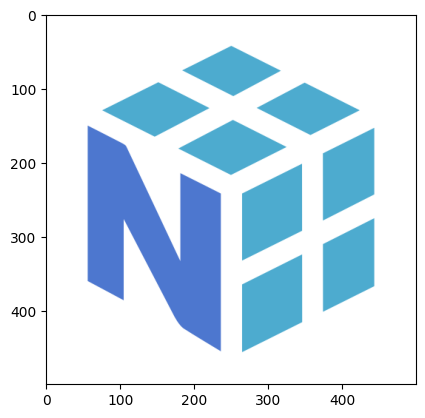

In [10]:
from matplotlib import pyplot as plt

plt.imshow(image)

**Exercise 1.2.1**

Determine the size of the image (number of pixels in x and y dimension).

In [11]:
image.shape

(500, 500, 4)

**Exercise 1.2.2**

Plot the bottom half of the image, i.e., the lines from x=250 on.

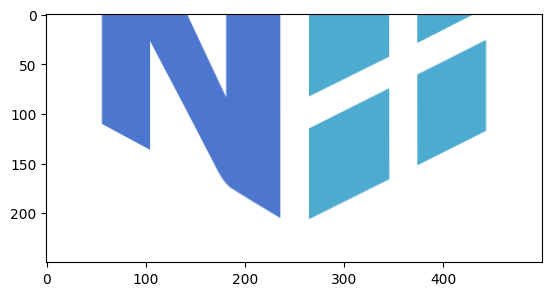

In [12]:
plt.imshow(image[250:, :, :])

**! Exercise 1.2.3**

Write a program to remove the whitespace around the image, i.e. crop the image. Remember that a white pixel is (255,255,255) in RGB but a colored will have different values.

In [13]:
# Iterate over rows to find the minimum row index (min_x) with non-equal RGB values
for i in range(image.shape[0]):
    # Check if all RGB values in the row are equal -- if they are we assume the pixel is white since white is (255, 255, 255) in RGB
    if np.array_equal(image[i, :, 0], image[i, :, 1]) and np.array_equal(
        image[i, :, 1], image[i, :, 2]
    ):
        # If all RGB values are equal, continue to the next row
        continue
    # If RGB values are not equal and therefore a colored pixel, set min_x to the current row index and exit the loop
    break
min_x = i - 1  # Decrement by 1 to adjust for the last iteration

# Iterate over rows in reverse to find the maximum row index (max_x) with non-equal RGB values
for i in range(image.shape[0] - 1, 0, -1):
    # Check if all RGB values in the row are equal
    if np.array_equal(image[i, :, 0], image[i, :, 1]) and np.array_equal(
        image[i, :, 1], image[i, :, 2]
    ):
        # If all RGB values are equal, continue to the previous row
        continue
    # If RGB values are not equal, set max_x to the current row index and exit the loop
    break
max_x = i + 1  # Increment by 1 to adjust for the last iteration

# Iterate over columns to find the minimum column index (min_y) with non-equal RGB values
for i in range(image.shape[1]):
    # Check if all RGB values in the column are equal
    if np.array_equal(image[:, i, 0], image[:, i, 1]) and np.array_equal(
        image[:, i, 1], image[:, i, 2]
    ):
        # If all RGB values are equal, continue to the next column
        continue
    # If RGB values are not equal, set min_y to the current column index and exit the loop
    break
min_y = i - 1  # Decrement by 1 to adjust for the last iteration

# Iterate over columns in reverse to find the maximum column index (max_y) with non-equal RGB values
for i in range(image.shape[1] - 1, 0, -1):
    # Check if all RGB values in the column are equal
    if np.array_equal(image[:, i, 0], image[:, i, 1]) and np.array_equal(
        image[:, i, 1], image[:, i, 2]
    ):
        # If all RGB values are equal, continue to the previous column
        continue
    # If RGB values are not equal, set max_y to the current column index and exit the loop
    break
max_y = i + 1  # Increment by 1 to adjust for the last iteration

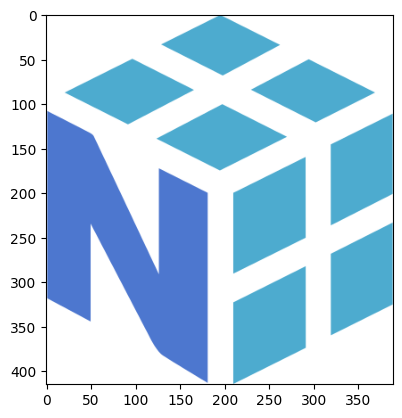

In [14]:
plt.imshow(image[min_x:max_x, min_y:max_y])

**! Exercise 1.2.4**

Using NumPy's `linalg` module, solve the equation **Ax** = **b**, where:

$$
\textbf{A}=
\begin{bmatrix}
8 & -6 & 2\\
-4 & 11 & -7\\
4 & -7 & 6
\end{bmatrix}
\quad
\mathrm{and} \quad \textbf{b} = \begin{bmatrix}
28\\
-40\\
33
\end{bmatrix}
$$

In [15]:
a = np.array([[8, -6, 2], [-4, 11, -7], [4, -7, 6]])

b = np.array([28, -40, 33])

from numpy.linalg import solve

solve(a, b)

array([ 2., -1.,  3.])

Determine the inverse of **A**

In [16]:
from numpy.linalg import inv

inv(a)

array([[ 0.1328125,  0.171875 ,  0.15625  ],
       [-0.03125  ,  0.3125   ,  0.375    ],
       [-0.125    ,  0.25     ,  0.5      ]])

# Scipy


**Exercise 3.1**

A colleague of yours who uses MATLAB sent you data in the mat file `points.mat`. Load this file and retrieve the x and y arrays in it. Using matplotlib, plot the (x, y) points.

In [17]:
import scipy.io as sio

mat_file = sio.loadmat("points.mat")
x = mat_file["x"][0]  # do [0] to extract the array from the unnecessary nested array
y = mat_file["y"][0]

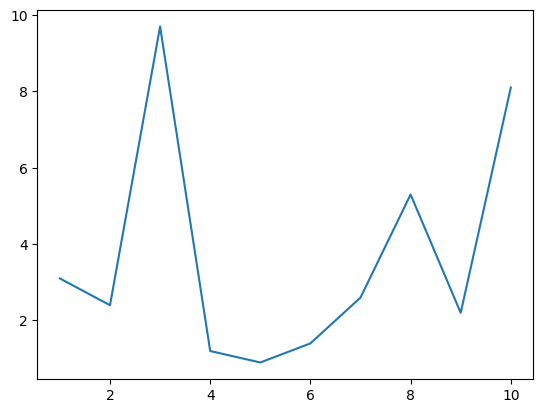

In [18]:
plt.plot(x, y)

**! Exercise 3.2**

Using Scipy's `interpolate` module, interpolate the datapoints using (1) nearest neighbors, and (2) cubic splines. Plot the interpolants.

In [19]:
from scipy.interpolate import interp1d

fcubic = interp1d(x, y, kind="cubic")
fnear = interp1d(x, y, kind="nearest")

xnew = np.linspace(1, 10, num=50, endpoint=True)

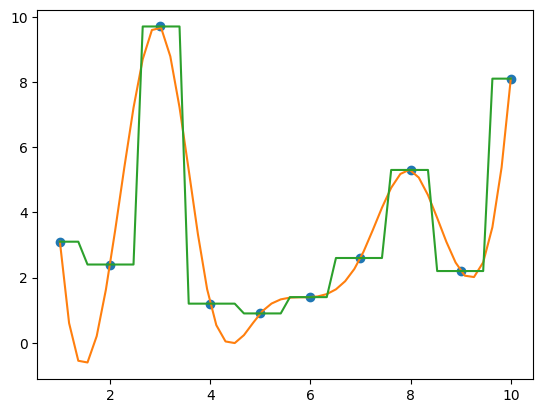

In [20]:
plt.plot(x, y, "o", xnew, fcubic(xnew), xnew, fnear(xnew));

**! Exercise 3.3**

Using Scipy's `integrate` module, determine the integral (area under the curve) of the interpolants between 1 and 10. Do so using one or both of the interpolation functions previously calculated.

In [21]:
# area under the curve
import scipy.integrate as integrate

integrate.quad(fnear, 1, 10)

/tmp/ipykernel_684438/750090824.py:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integrate.quad(fnear, 1, 10)


(31.30825803041668, 0.23541001359585678)

In [22]:
integrate.quad(fcubic, 1, 10)

(28.36936620204714, 3.6113703836491304e-07)

**Bonus Exercise**

In [23]:
from scipy import ndimage

In [24]:
def smooth(img, sigma=2):
    """Create a copy of image smoothed with a Gaussian filter."""
    # TODO
    # Hint: look for scipy.ndimage.gaussian_filter
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html
    #
    # Hint: if img is 3D, we don't want to smooth along the last dimension...
    # `gaussian_filter` allows specifying a different `sigma` for each
    # dimension.
    # TODO_BEGIN

    # Create an array containing the value of sigma for each dimension of the input image
    full_sigma = np.ones(img.ndim) * sigma
    # If the image is 3D (if not full_sigma[2:] returns nothing and therefore nothing is modified) we set the last value of sigma to 0.
    # This ensures that the last dimensions, i.e. color channels are not modified.
    # Note that this could also be done using an if statement
    full_sigma[2:] = 0.0
    # Apply the filter to your input using your sigma array
    return ndimage.gaussian_filter(img, full_sigma)
    # TODO_END

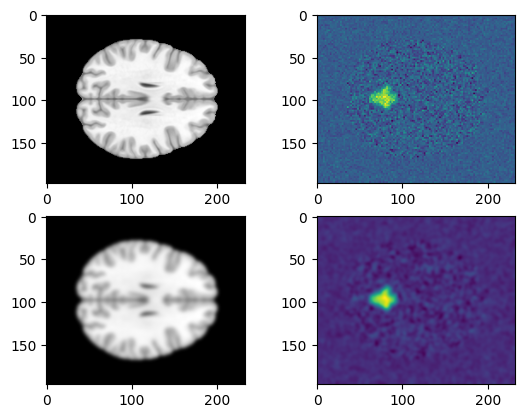

In [25]:
images = np.load("images.npz")
template = images["mni_template"]
smoothed_template = smooth(template)

fig, axes = plt.subplots(2, 2)
axes[0, 0].imshow(template, cmap="gray")
axes[1, 0].imshow(smoothed_template, cmap="gray")

img = images["difumo"]
axes[0, 1].imshow(img[..., 3])
smoothed_img = smooth(img)
axes[1, 1].imshow(smoothed_img[..., 3])
for i in range(5):
    assert np.allclose(smoothed_img[..., i], smooth(img[..., i]))

plt.show()